In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

from plotnine import *
theme_set(theme_matplotlib())

In [2]:
hommik = 6  # hommikune äratus kell 06:00
reservaeg = 16.75  # reservaja algus kell 16:45
esimene_päev = datetime(2023, 7, 17).timetuple().tm_yday  # teenistuse esimene päev 17.07.2023

In [3]:
df = pd.read_csv('andmed/spioonid.csv')

df['kuupäev'] = df['kuupäev'].apply(lambda x: datetime.fromisoformat(x))
df['tund'] = df['kuupäev'].apply(lambda x: (x - x.replace(hour=0, minute=0, second=0)).total_seconds() / 3600)
df['päev'] = df['kuupäev'].apply(lambda x: x.timetuple().tm_yday - esimene_päev)
df['päev_n'] = df.groupby('päev').cumcount()
df['tühemik'] = df.groupby('päev')['tund'].diff().fillna(df['tund'] - hommik)
df['tegevusaeg'] = (df['tund'] >= reservaeg).map({True: 'Vaba- ja reservaeg', False:'Muu aeg'})

df.tail()

,kuupäev,tund,päev,päev_n,tühemik,tegevusaeg
114,2023-09-06 21:58:15,21.970833,51,10,0.125833,Vaba- ja reservaeg
115,2023-09-07 08:13:03,8.217500,52,0,2.217500,Muu aeg
116,2023-09-07 08:20:37,8.343611,52,1,0.126111,Muu aeg
117,2023-09-07 23:15:24,23.256667,52,2,14.913056,Vaba- ja reservaeg
118,2023-09-08 22:45:46,22.762778,53,0,16.762778,Vaba- ja reservaeg


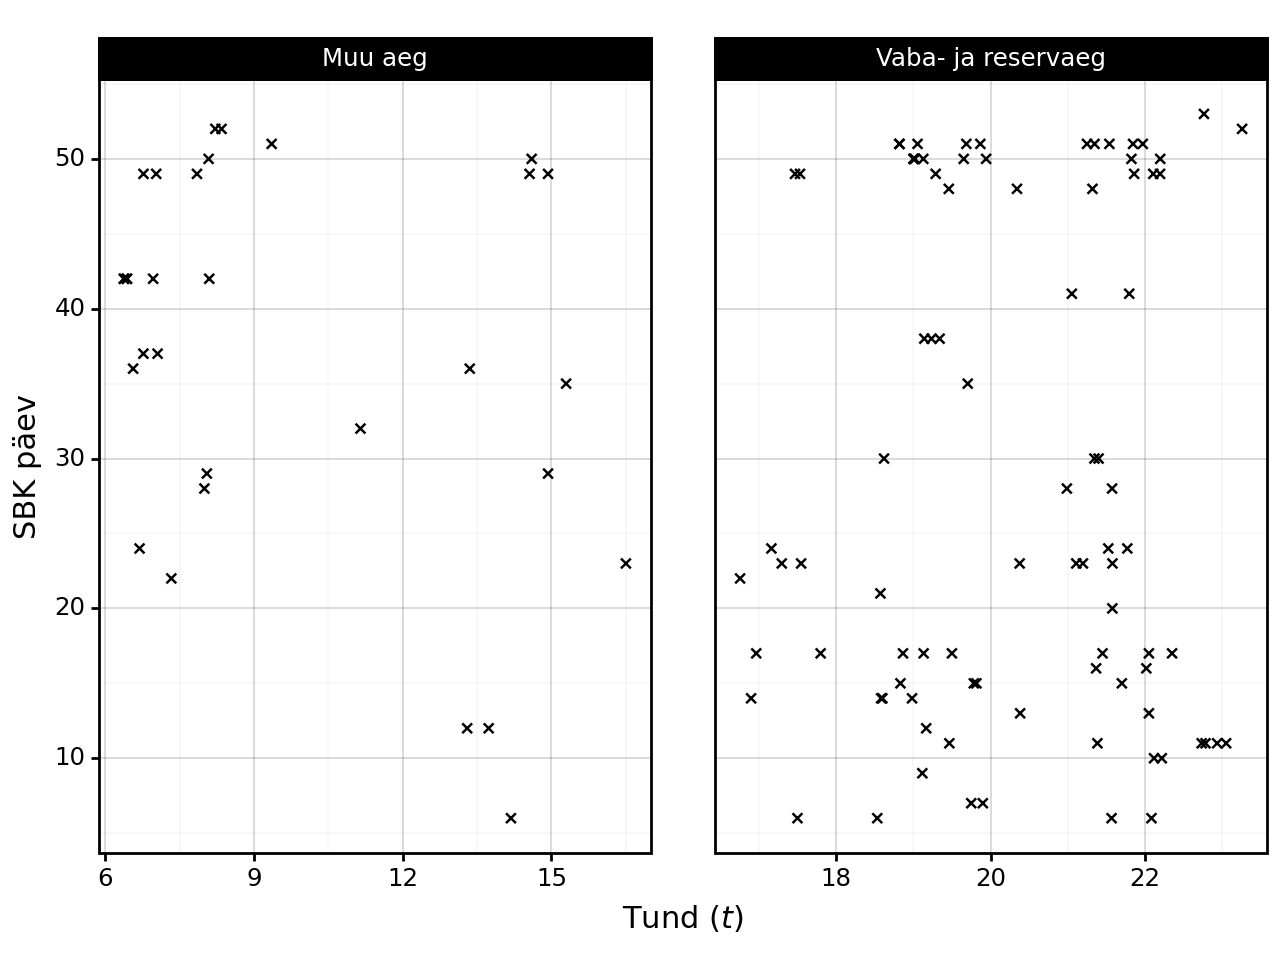

<Figure Size: (640 x 480)>

In [4]:
g = ggplot(df) + facet_wrap('tegevusaeg', scales='free_x') + aes('tund', 'päev')
g += theme_linedraw() + theme(panel_spacing=0.05)
g += labs(x='Tund $(t)$', y='SBK päev')
g += geom_point(shape='x')

# g.save('joonised/punktiprotsessid.png', dpi=100)
g